## Import Packages

In [1]:
import os
import sys
import numpy as np
import errno

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

import pandas as pd
import random as rn
from itertools import cycle
import time
from collections import OrderedDict

In [2]:
from looti import emulatorpaths as epath

#from looti  import tools as too
from looti  import interpolators as itp

from looti import dataplotters as dtp

from looti import dictlearn as dcl

from looti import datahandle as dhl

#sns.set()

In [3]:
from looti import read_file as rf

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Run Parameters

## Import Data

The user must provide the folder where the data are stored : Datafolder.
It is expected that inside this folder, the data are organised in the following way :
- One folder per parameters
- These folders must contain the names/abreviations and values of the parameters used within its name.  
- The parameters'names must be seperated by a character e.g : _ , -- , ;
- Each of these folders contains files where is stored the matter power spectrum or ratio at given redshifts.
- The name of these files should contains the snapshot/redshift

Considering the following path as an exemple : MassiveNus/mnv0.00000_om0.30000_As2.1000/powerspec_tot_034.txt
- Datafolder is MassiveNus
- Parameters names are mnv,om,As and they are separated by : " _ " 
- The folder mnv0.00000_om0.30000_As2.1000 contains the power matter spetrum for these parameters for different redshift e.g powerspec_tot_034.txt for snapshot "034"



Indicate the name path of the datafolder :

In [5]:
datafolder = '../../Codecs/'
#datafolder = datafolder = '../../optimaltransport/raw_pofk/ELEPHANT/ratio_fofr_gr/'

In [6]:
os.path.isdir(datafolder) #Check if the folder exists

True

In [7]:
#rf.ask_param(os.listdir(datafolder))

# Read the parameters names and seperation

The following function will read the first file within the datafolder. It will assume that this file is a relevant example. As explained above this file should contains the name of the parameters seperated by a character and the values of the parameters.

The function will asks the user to provide the names of the parameters and the seperations used. 

#  Construct the frame 

The following function will construct the dataframe.
If the function ask_param has been runned the user should only change the following parameters :
- feature_filename : the begining of the files'name containing the values of matter power spectrum/ratio
- filename_format : the format of the files'name containing the values of matter power spectrum/ratio
- grid_pos : the column which contains the grid, e.g, grid_pos=0 would assume that the grid corresponds to the first column
- feature_pos=1 : the column which contains matter power spectrum/ratio, e.g feature_pos=1 would assume that the features are in the second column.


In [8]:
### The parameters that the user should change :
feature_filename="CoDECS_power_all_" ### Beginning of the files'names containing the features
filename_format="txt"  #extension of the files 
grid_pos=0 # column corresponding to the grid
feature_pos=2 # column corresponding to the features

In [9]:
####Run to construct the database
data_frame_ext =rf. create_DataFrame(datafolder,["beta"], "_", None,


                     feature_filename=feature_filename, filename_format=filename_format,
                     
                     grid_pos=grid_pos, feature_pos=feature_pos)

<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
['beta0.05', '.DS_Store', 'beta1', 'LCDM', 'beta1.5']
../../Codecs//beta0.05/CoDECS_power_all_011.txt can't be  read
../../Codecs//beta0.05/CoDECS_power_all_006.txt can't be  read
<class 'ValueError'>
../../Codecs//beta1/CoDECS_power_all_011.txt can't be  read
../../Codecs//beta1/CoDECS_power_all_006.txt can't be  read
../../Codecs//LCDM/CoDECS_power_all_011.txt can't be  read
../../Codecs//LCDM/CoDECS_power_all_006.txt can't be  read
../../Codecs//beta1.5/CoDECS_power_all_011.txt can't be  read
../../Codecs//beta1.5/CoDECS_power_all_006.txt can't be  read


/Users/raphaelbaena/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


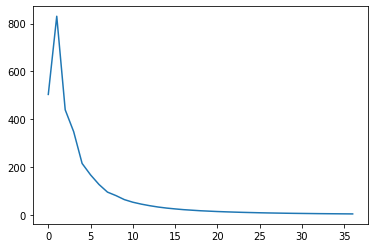

In [15]:
plt.plot(data_frame_ext.values[0])

In [11]:
####Run to construct the database
data_frame_lc =rf. create_DataFrame(datafolder,["beta"], "_", None,


                     feature_filename=feature_filename, filename_format=filename_format,
                     
                     grid_pos=grid_pos, feature_pos=feature_pos,LCDM_mode=True, LCDM_folder ="LCDM")

<class 'ValueError'>
['LCDM']
../../Codecs//LCDM/CoDECS_power_all_011.txt can't be  read
../../Codecs//LCDM/CoDECS_power_all_006.txt can't be  read


In [12]:
data_frame_lc

0        1        2        3        4        5   \
noise_model redshift                                                         
theo        15        503.614  830.611  439.292  347.898  214.864  167.015   
            29        1889.77  3104.86  1633.24   1297.8  808.305  631.197   
            38        4240.02  6932.96  3626.48  2887.61  1820.07  1429.17   
            61        8748.17  14196.2  7370.92  5871.06  3773.47  2985.35   
            76          11257  18198.5  9419.08  7497.96  4866.49  3862.82   
            66        9603.61  15563.8  8071.84  6428.27  4145.68  3283.68   
            71        10440.2  16898.4  8754.72  6970.67  4510.14  3576.28   
            41        5248.25  8565.94  4472.06  3562.11  2255.67  1774.64   
            56        7880.14  12805.1  6656.81  5302.89  3396.27  2683.56   
            81        12049.4  19457.2  10061.5  8007.41  5212.64  4141.57   
            46        6124.04  9980.22   5202.5  4144.49  2634.68  2076.01   
            86        12816.8    20674  10681.8  8498.93  5548.33  4412.27   
            92        13555.4  21842.6    11277  8970.21  5871.78  4673.45   
            51        7003.71    11397  5932.64  4726.29  3015.92  2379.81   
            23        1076.95  1773.02  935.211  741.971  459.944   358.27   
            35        3262.87   5345.2  2801.79  2229.66  1398.72  1096.03   
            19        736.987  1214.54  641.568  508.518  314.553  244.724   
            26        1428.46  2349.55  1237.73  982.743  610.475  476.065   
            32        2490.39  4086.23  2145.89  1706.49   1066.3  834.002   

                           6        7        8        9   ...       27  \
noise_model redshift                                      ...            
theo        15        126.819  94.9574  80.4217  63.5305  ...  7.25646   
            29        480.632  362.981  308.947  247.121  ...   34.502   
            38        1094.59  837.285  715.612   583.01  ...  103.659   
            61        2310.63  1803.53  1547.71  1294.32  ...  306.339   
            76        3006.27  2369.02  2036.78  1722.14  ...   453.53   
            66        2546.35  1994.23  1712.45  1437.78  ...   353.84   
            71        2778.34  2182.84  1875.56  1580.49  ...  402.922   
            41        1362.49  1047.37  896.172  735.061  ...  141.437   
            56           2073  1612.32   1382.7  1151.36  ...  260.921   
            81         3228.7  2551.49  2194.98  1861.65  ...  504.952   
            46        1597.19  1232.79   1055.7  870.597  ...  177.979   
            86        3445.35  2729.94  2349.87  1998.67  ...  556.628   
            92        3654.98  2903.27  2500.48  2132.33  ...  607.961   
            51        1834.68  1421.64  1218.33  1009.79  ...  217.981   
            23        272.301  204.629  173.734  137.963  ...  17.2167   
            35         837.42  637.333   543.97  440.012  ...  71.6078   
            19        185.883  139.388  118.181  93.5569  ...   11.085   
            26        362.109  272.712  231.813  184.671  ...  24.2442   
            32        635.997  481.985  410.803  330.264  ...  49.5551   

                           28       29       30       31       32       33  \
noise_model redshift                                                         
theo        15        6.66888  6.15193  5.74207  5.33222  4.92236  4.62388   
            29        32.1584  30.0786  28.3991  26.7196  25.0401  23.7874   
            38        97.9521   92.852  88.6726  84.4933   80.314  77.1486   
            61        293.219  281.314  271.254  261.193  251.133   243.41   
            76        436.055  420.022  406.177  392.331  378.486  367.632   
            66        339.222  325.914  314.594  303.273  291.952  283.203   
            71         386.84  372.143  359.547  346.952  334.357  324.554   
            41        134.158  127.638  122.268  116.898  111.528  107.462   
            56        249.304    238.8  229.984  221.